![](img/logo.png)

# Data analysis: Pandas and Seaborn

[![Pandas banner](https://pandas.pydata.org/static/img/pandas.svg)](http://pandas.pydata.org/)

__Pandas__ is a very strong library for manipulating large and complex datasets using a new data structure, the **data frame**, which models a table of data.

Pandas helps to close the gap between Python and R for data analysis and statistical computing.

Pandas data frames address three deficiencies of NumPy arrays:

- data frames hold heterogenous data; each column can have its own numpy.dtype,
- the axes of a data frame are labeled with column names and row indices,
- and, they account for missing values which this is not directly supported by arrays.

Data frames are extremely useful for data manipulation.
They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('Pandas version:', pd.__version__)

Pandas version: 1.3.4


# Statistical Analysis of Life History Traits

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 

In [41]:
data = pd.read_csv('../data/anage_data.txt', sep='\t', index_col='HAGRID') # lots of other pd.read_... functions
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4219, 30)


Pandas holds data in `DataFrame` (similar to __R__).

`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell has one observation), and each column has a single variable. 

Variables can be numbers or strings.

The `head` method gives us the 5 first rows of the data frame.

In [42]:
data.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
HAGRID,,,,,,,,,,,,,,,,,,,,,
3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In [43]:
data.tail()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
HAGRID,,,,,,,,,,,,,,,,,,,,,
4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,NaN,NaN,...,688,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN,688
4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,NaN,NaN,...,1289,wild,medium,acceptable,NaN,999.0,NaN,NaN,NaN,"501,710,1289"
4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,NaN,NaN,...,NaN,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,"4,12,15,44,45,53,56,69,337,338,460,746,932,936..."
4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,NaN,NaN,...,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN,"772,878,1129"
4244,Fungi,Ascomycota,Sordariomycetes,Sordariales,Lasiosphaeriaceae,Podospora,anserina,Filamentous fungus,NaN,NaN,...,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN,"767,768,769,770,771,921,1203"


In [44]:
data.shape

(4219, 30)

The column attribute holds the column names

In [45]:
print(data.columns)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species',
       'Common name', 'Female maturity (days)', 'Male maturity (days)',
       'Gestation/Incubation (days)', 'Weaning (days)', 'Litter/Clutch size',
       'Litters/Clutches per year', 'Inter-litter/Interbirth interval',
       'Birth weight (g)', 'Weaning weight (g)', 'Adult weight (g)',
       'Growth rate (1/days)', 'Maximum longevity (yrs)', 'Source',
       'Specimen origin', 'Sample size', 'Data quality', 'IMR (per yr)',
       'MRDT (yrs)', 'Metabolic rate (W)', 'Body mass (g)', 'Temperature (K)',
       'References'],
      dtype='object')


In [46]:
data.columns[:3]

Index(['Kingdom', 'Phylum', 'Class'], dtype='object')

We can select a specific column:

(note that the result is a view, not a new object!)

In [47]:
body_mass = data['Body mass (g)']
print(type(body_mass))
print(len(body_mass))

<class 'pandas.core.series.Series'>
4219


We can look for the min / max value in a column

In [48]:
# general min / max functions
print(min(body_mass))
print(max(body_mass))

# pandas min/max - ignores missing values (nan)
print(body_mass.min())
print(body_mass.max())

nan
nan
0.76
3672000.0


We can examine how many unique values there are in a specific column:

In [49]:
data['Kingdom'].unique()

array(['Animalia', 'Plantae', 'Fungi'], dtype=object)

In [50]:
data['Phylum'].unique()

array(['Arthropoda', 'Chordata', 'Cnidaria', 'Echinodermata', 'Mollusca',
       'Nematoda', 'Porifera', 'Pinophyta', 'Ascomycota'], dtype=object)

In [51]:
data.columns[:7]

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'], dtype='object')

In [52]:
for col in data.columns[:7]:
    print('Unique {}:\t{}'.format(col, len(data[col].unique())))

Unique Kingdom:	3
Unique Phylum:	9
Unique Class:	25
Unique Order:	135
Unique Family:	534
Unique Genus:	2053
Unique Species:	3142


Pandas' `DataFrame` allows richer indexing.

For example, let's browse our data for species that have body mass greater than 300 kg.

First we will a create new column (`Series` object) that tells us if a row is a large animal row or not:

In [53]:
large_index = data['Body mass (g)'] > 300 * 1000 # 300 kg
large_index.head()

HAGRID
3    False
5    False
6    False
8    False
9    False
Name: Body mass (g), dtype: bool

In [54]:
print(large_index.shape)
print(large_index.sum())

(4219,)
5


Now, we can slice our data with this boolean index.

In [55]:
large_data = data[large_index] # Note: this is not a new data frame! just a view.
large_data

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
HAGRID,,,,,,,,,,,,,,,,,,,,,
1564,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Bos,taurus,Domestic cattle,548.0,NaN,...,434,captivity,large,questionable,NaN,NaN,306.7700,347000.0,311.15,"36,189,434,436,715,731,978,1071,1136,1262"
1659,Animalia,Chordata,Mammalia,Artiodactyla,Camelidae,Camelus,dromedarius,Dromedary,1095.0,2191.0,...,671,captivity,medium,acceptable,NaN,NaN,224.7790,407000.0,310.65,"36,302,303,434,455,610,671,680,1014,1136"
1665,Animalia,Chordata,Mammalia,Artiodactyla,Cervidae,Alces,alces,Moose,751.0,612.0,...,NaN,unknown,medium,low,NaN,NaN,286.8470,325000.0,311.75,"1,36,420,434,441,455,538,671,676,677,680,731,8..."
2473,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Elephas,maximus,Asiatic elephant,3287.0,3287.0,...,671,captivity,large,acceptable,NaN,NaN,2336.5000,3672000.0,308.95,"2,36,434,436,455,536,568,610,671,680,1006,1097..."
2841,Animalia,Chordata,Mammalia,Sirenia,Trichechidae,Trichechus,manatus,West Indian manatee,1278.0,913.0,...,1302,captivity,medium,acceptable,NaN,NaN,70.0056,450000.0,NaN,"2,433,434,441,443,455,610,680,731,1302"


The `iterrows` method let's us iterate over the rows of the data.

For each row we get both the row as a `Series` object (similar to `dict` for our use) and the row number as an `int` (this is similar to the use of `enumerate` on lists and strings).

In [56]:
for i, row in large_data.iterrows(): 
    print(row['Common name'], row['Body mass (g)']/1000, 'kg')

Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asiatic elephant 3672.0 kg
West Indian manatee 450.0 kg


So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is the single-humped camel.

![Camel](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Camelus_dromedarius_in_Nuweiba.jpg/320px-Camelus_dromedarius_in_Nuweiba.jpg)

In [57]:
data['Body mass (g)'][:3]

HAGRID
3   NaN
5   NaN
6   NaN
Name: Body mass (g), dtype: float64

By looking at the first 3 measurements we see that there are quite a few missing values. 

NaN are slots that were empty in the data file.

NaN values can be treated in many ways, one straightforward solution is simply remove these lines.

In [58]:
clean = data.dropna(subset = ['Body mass (g)', 'Metabolic rate (W)'])
# drops a line if nan values is in subset

clean.shape

(627, 30)

In [59]:
print((clean['Body mass (g)'] >  10 * 1000).sum())
print((clean['Body mass (g)'] <  10 * 1000).sum())

53
573


Let's continue with small and medium animals - we filter out anything that has body mass of more than 300 kg.

In [60]:
data = data[data['Body mass (g)'] <  300 * 1000] 
data.shape

(622, 30)

For starters, let's plot a scatter of body mass vs. metabolic rate.

Because we work with pandas, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

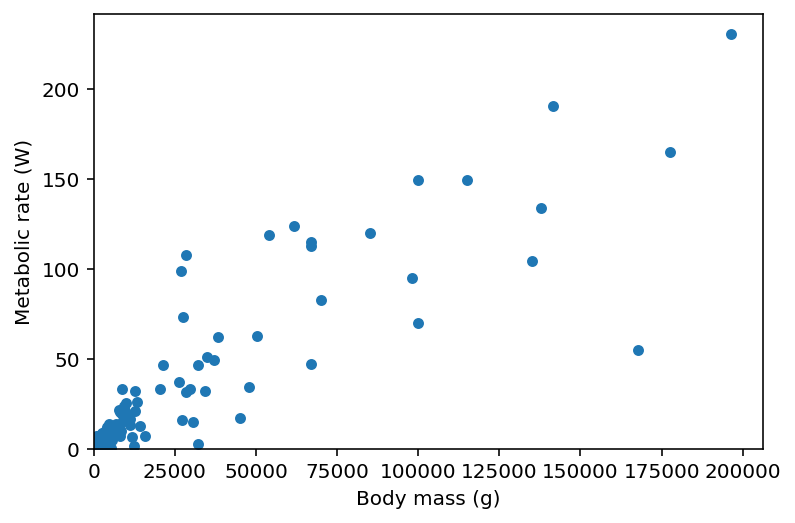

In [61]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)')
plt.xlim(0,None)
plt.ylim(0,None);

If this plot looks funny, you are probably using Pandas with version <0.22.

From this plot it seems that:
1. there is a correlation between body mass and metabolic rate, and 
1. there are many small animals (less than 2 kg) and not many medium or large animals (above 10 kg).
To deal with the second observation, let's plot it in log scale:

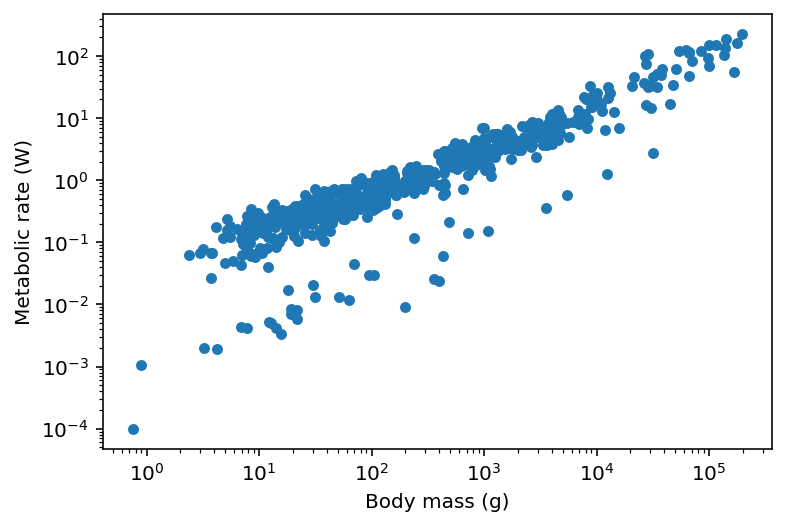

In [73]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)')
plt.xscale('log')
plt.yscale('log');

Before we continue, let's add another column that will show the mass in kg:

In [74]:
data['Body mass (kg)'] = data['Body mass (g)'] / 1000

Next, let's check how many records do we have for each Class (as in the taxonomic unit): 

In [75]:
class_counts = data['Class'].value_counts()
print(class_counts)

Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: Class, dtype: int64


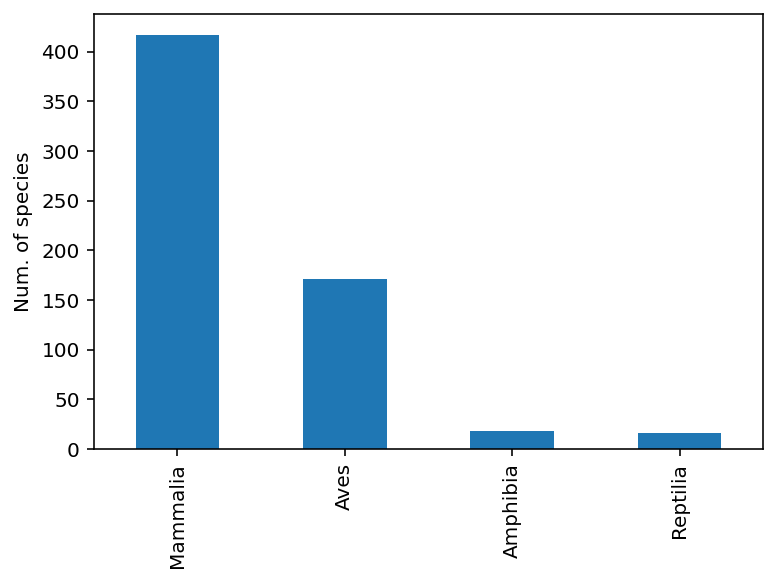

In [76]:
class_counts.plot.bar()
plt.ylabel('Num. of species');

So we have lots of mammals and birds, and a few reptiles and amphibians. 

This is important as amphibian and reptiles could have a different replationship between mass and metabolism because they are cold blooded.

## Exercise: data frames

1) **Print the number** of reptiles in this dataset, and how many of them are of the genus `Python`.

In [65]:
reptiles = 
pythons = 

In [66]:
print("# of reptiles: ", reptiles)
print("# of pythons: ", pythons)

# of reptiles:  16
# of pythons:  2


2) **Plot the histogram of the mammal body masses** using `plot.hist()`.

Since most mammals are small, the histogram looks better if we plot a cumulative distribution rather then the distribution - we can do this with the `cumulative` argument. You also need to specify a higher `bins` argument then the default.

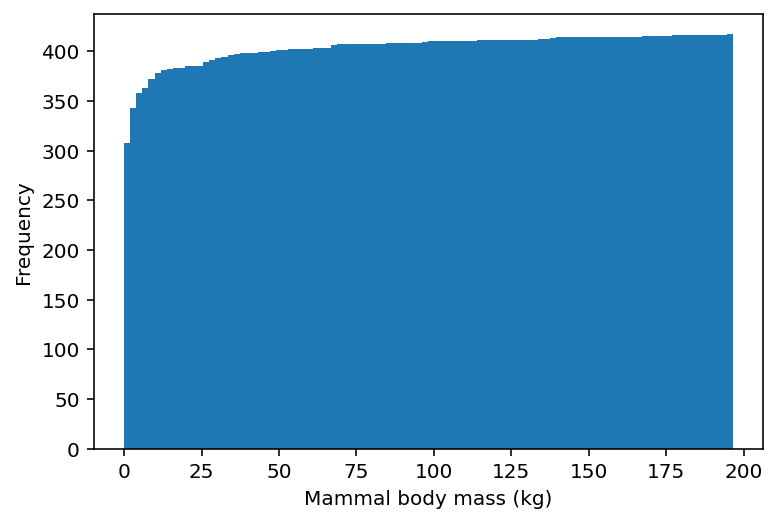

# Seaborn

Let's do a simple linear regression plot; but let's do it in separate for each Class. 

We can do this kind of thing with Matplotlib and [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), but a very good tool for statistical visualizations is **[Seaborn](http://seaborn.pydata.org)**.

Seaborn adds on top of Pandas a set of sophisticated statistical visualizations, similar to [ggplot2](http://ggplot2.org) for R.

In [79]:
import seaborn as sns
sns.set_context("talk") # this sets figure settings such as size of various elements

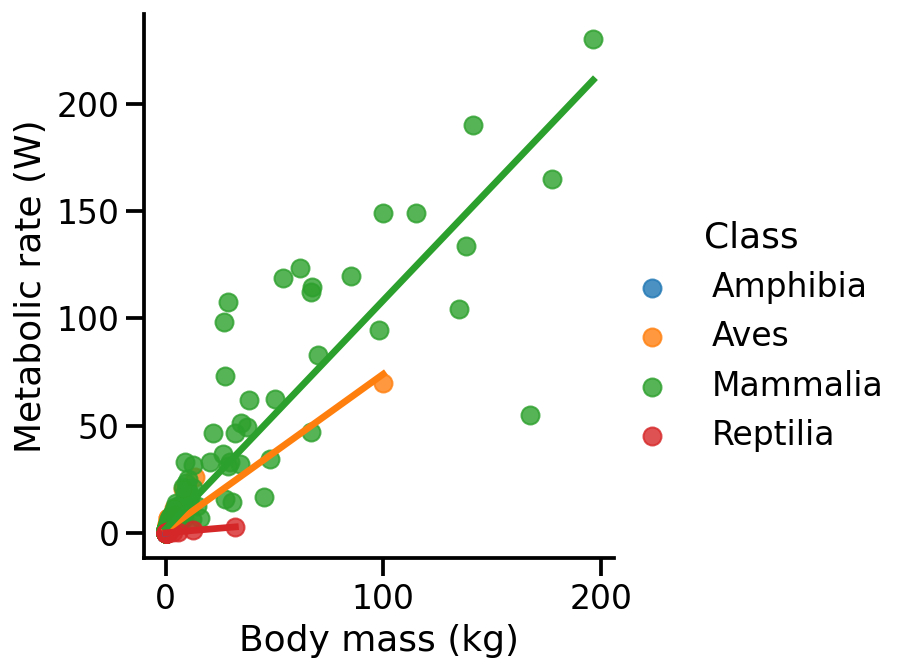

In [80]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Class', 
    data=data, 
    ci=None, 
);

- `hue` means _color_, but it also causes _seaborn_ to fit a different linear model to each of the Classes. 
- `ci` controls the confidence intervals. I chose `False`, but setting it to `True` will show them.

We can also seperate each class to a different plot (with the `col` argument):

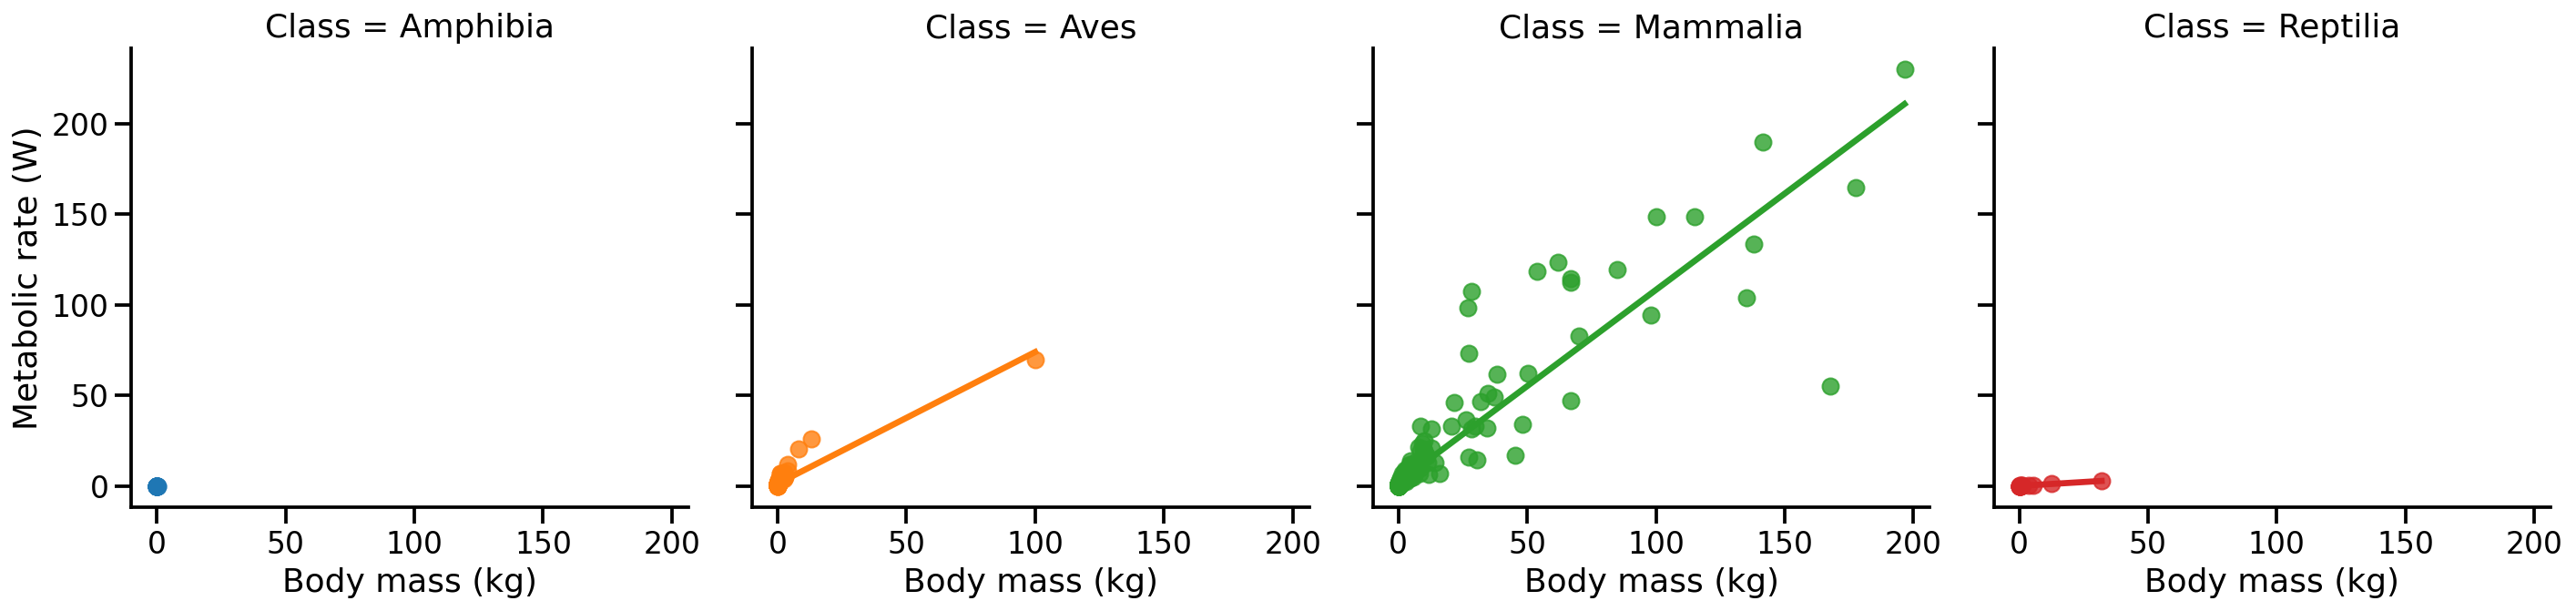

In [81]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Class', 
    col = 'Class',
    data=data, 
    ci=True, 
);

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass.

So let's stick to mammals; next up we will see which orders of mammals we have.

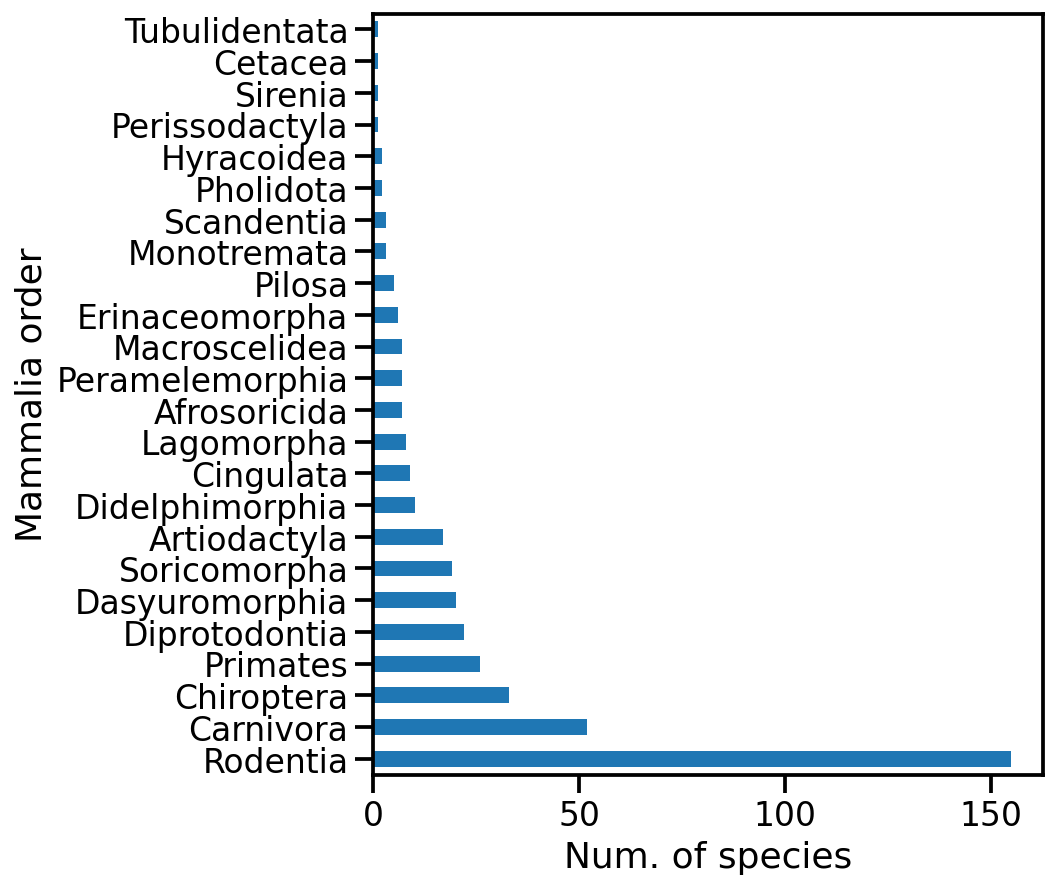

In [82]:
mammalia = data[data['Class']=='Mammalia']
order_counts = mammalia['Order'].value_counts()
ax = order_counts.plot.barh()
ax.set(
    xlabel='Num. of species',
    ylabel='Mammalia order'
)
ax.figure.set_figheight(7)

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [83]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia['Order'].isin(orders.index)]

Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: Order, dtype: int64


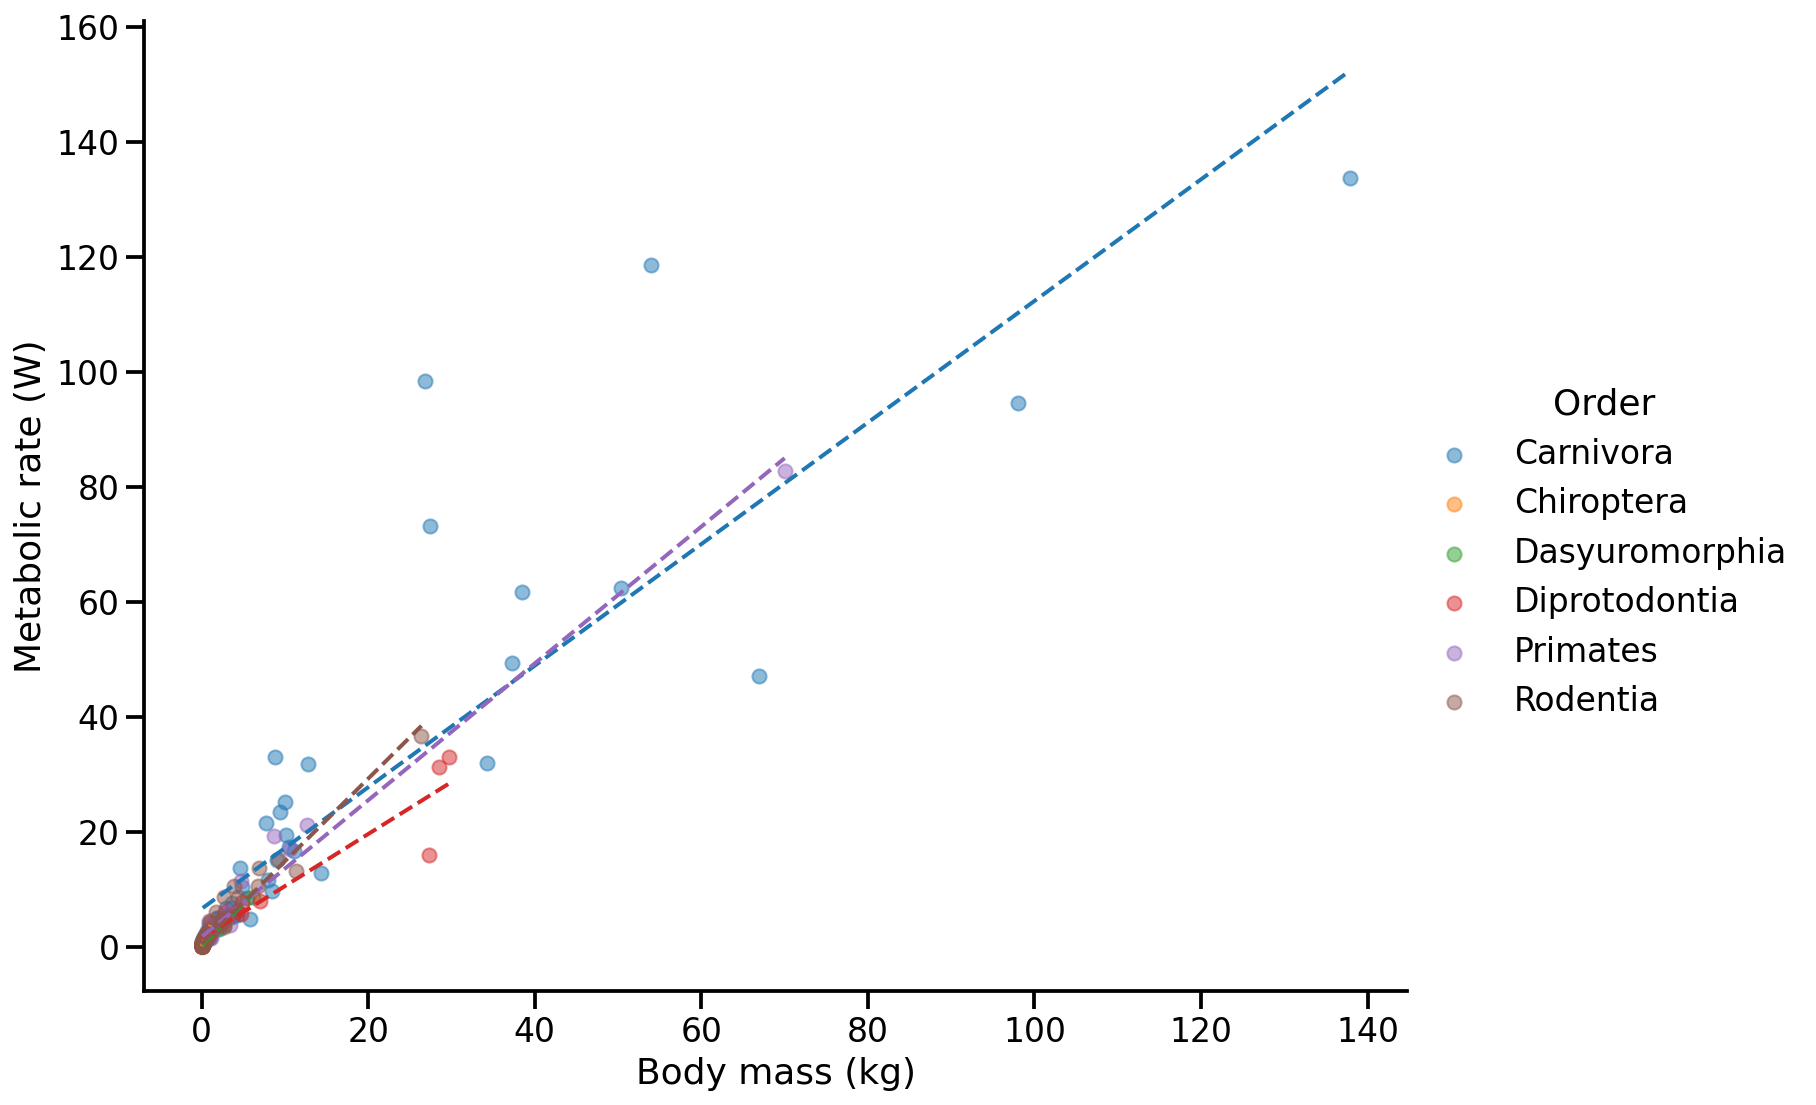

In [84]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Order',
    data=abund_mammalia, 
    ci=False, 
    height=8,
    aspect=1.3,
    line_kws={'lw':2, 'ls':'--'}, 
    scatter_kws={'s':50, 'alpha':0.5}
);

Because there is alot of data here we made the lines thinner - this can be done by giving _matplotlib_ keywords as a dictionary to the argument `line_kws` - and we made the markers bigger but with alpha (transperancy) 0.5 using the `scatter_kws` argument.

Still ,there's too much data, and part of the problem is that some orders are large (e.g. primates) and some are small (e.g. rodents).

Let's plot a separate regression plot for each order.
We do this using the `col` and `row` arguments of `lmplot`, but in general this can be done for any plot using [seaborn's `FacetGrid` function](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

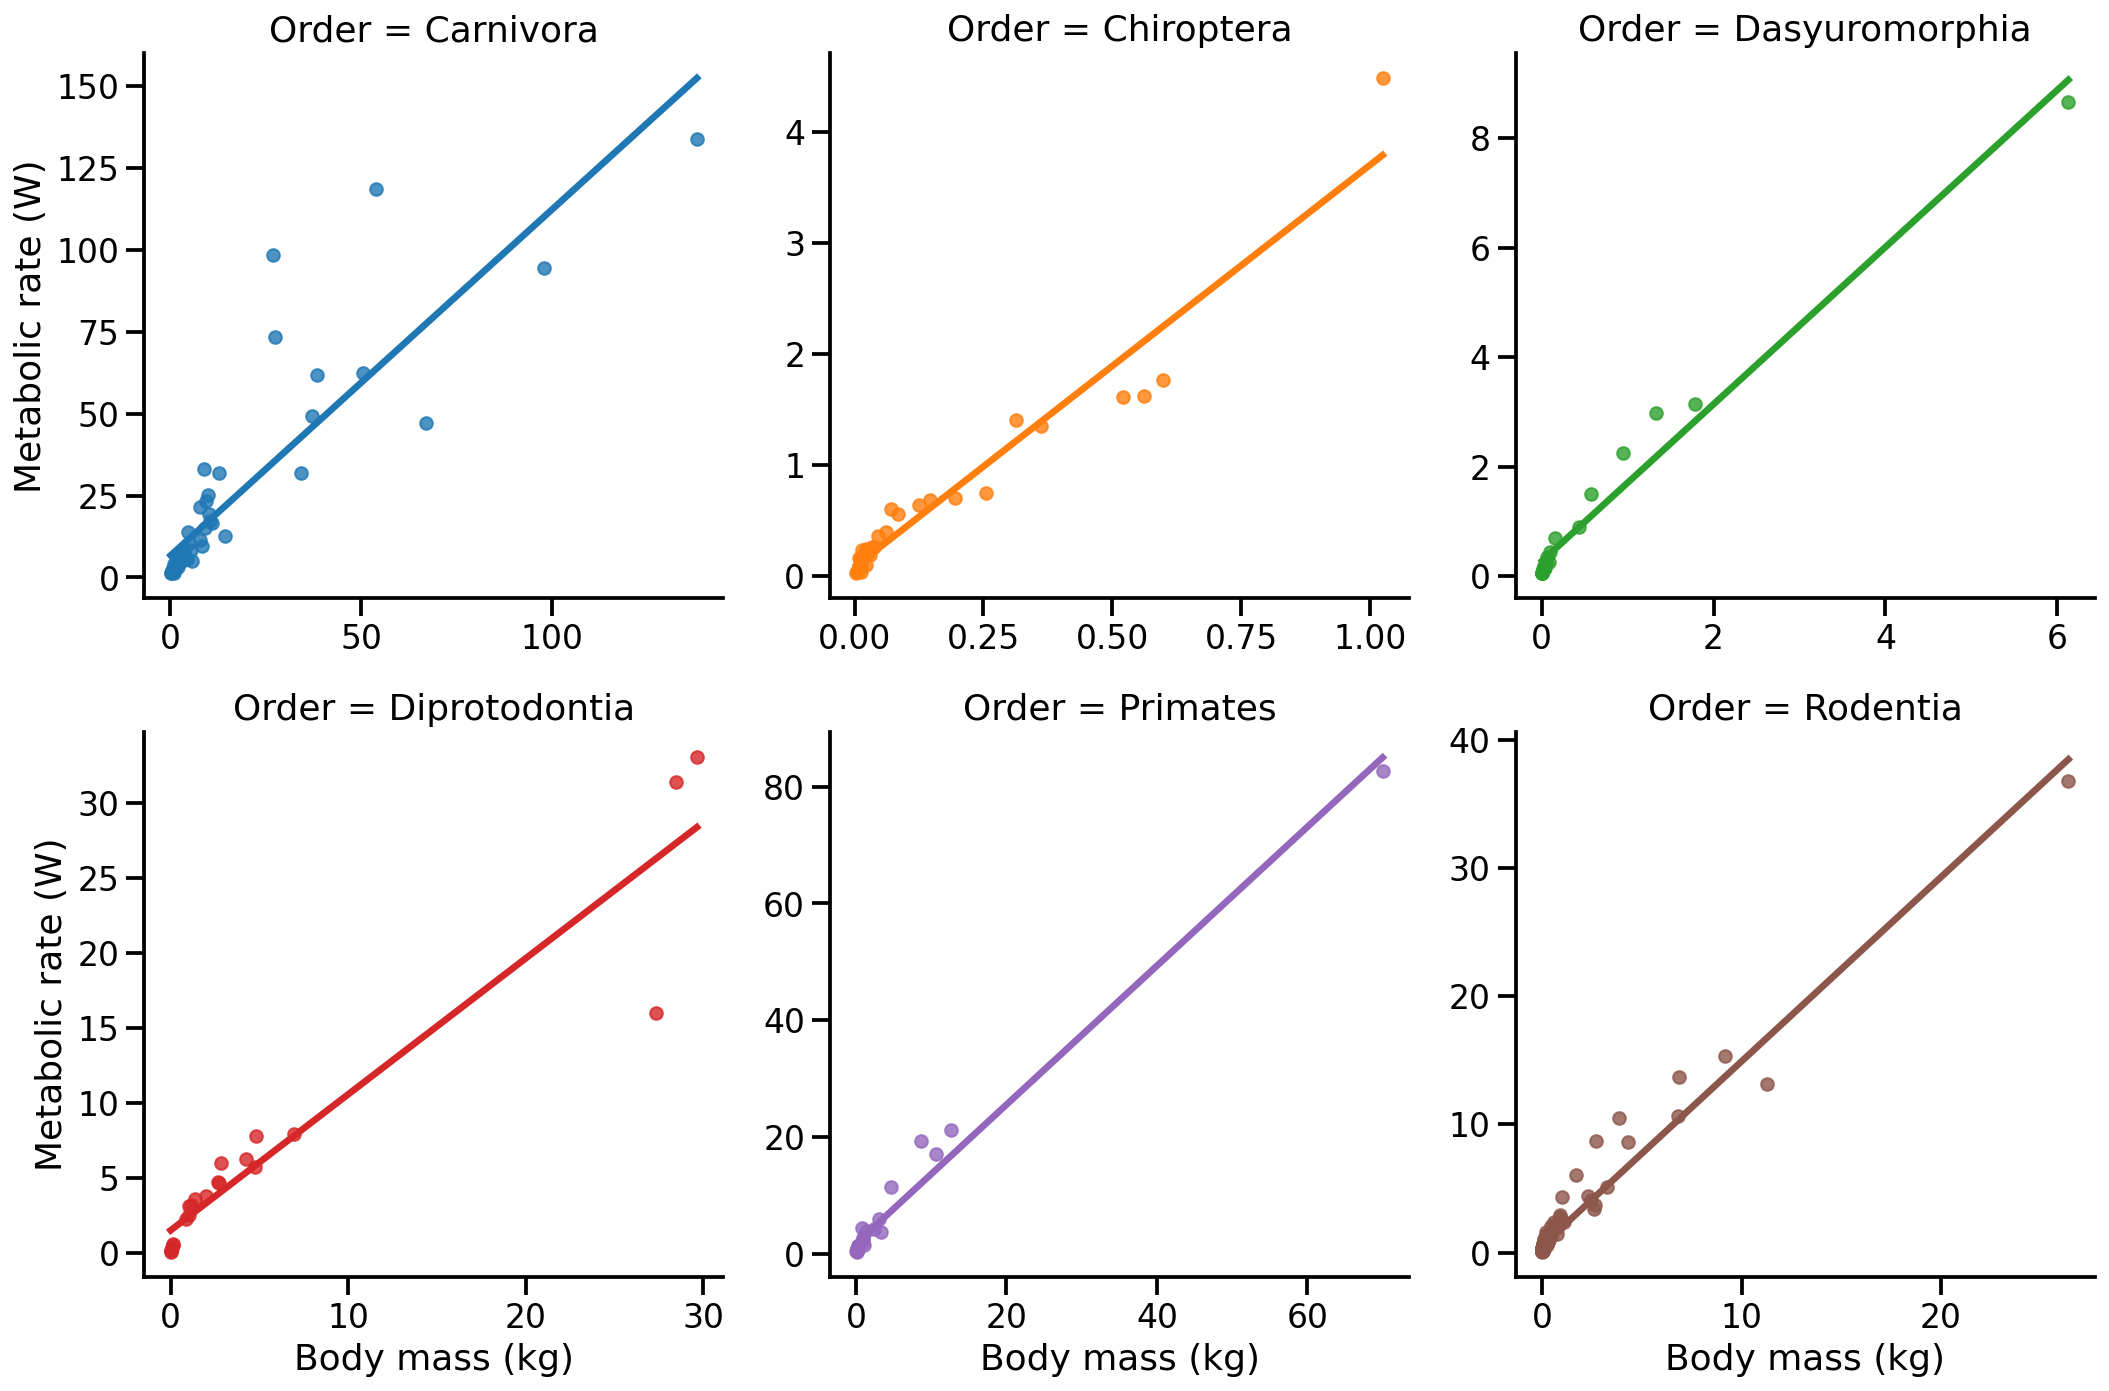

In [86]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=abund_mammalia, 
    hue='Order',
    col='Order', 
    col_wrap=3, 
    ci=False, 
    scatter_kws={'s':40}, 
    facet_kws=dict(sharex=False, sharey=False)
);

We used the `sharex=False` and `sharey=False` arguments so that each Order will have a different axis range and so the data is will spread nicely.

There are plenty more types of figure, look at [seaborn galery](https://seaborn.pydata.org/examples/index.html).

One more example, a [joint plot](https://seaborn.pydata.org/examples/hexbin_marginals.html):

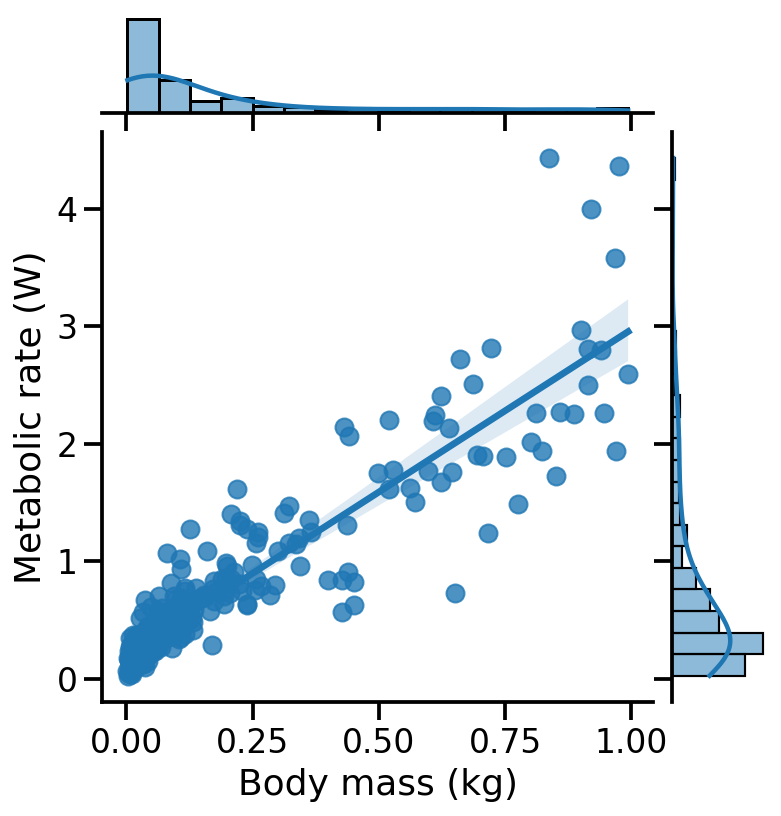

In [87]:
small = mammalia[mammalia['Body mass (kg)'] < 1]
sns.jointplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=small, 
    kind='reg'
);

## __Some statistics__

Lastly, let's do some quick statistics.

First, calculate a summary of the the mammals using `describe`.

In [88]:
mass = abund_mammalia
mass.describe()

,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),Body mass (kg)
count,255.000000,190.000000,279.000000,252.000000,306.000000,250.00000,200.000000,260.000000,169.000000,308.000000,104.000000,259.000000,5.000000,5.000000,308.000000,308.000000,273.000000,308.000000
mean,378.423529,445.689474,62.573477,80.396825,3.340686,1.96900,240.650000,173.817317,1055.666805,5048.303084,0.031044,14.732819,0.014640,2.620000,5.722388,3666.744805,309.793516,3.666745
std,412.882713,503.681172,52.988741,85.983514,2.266984,1.36074,179.327688,979.288670,3478.769937,18036.408022,0.024898,11.109210,0.025658,3.395144,16.048335,12815.685721,1.419072,12.815686
min,24.000000,36.000000,12.000000,13.000000,1.000000,0.30000,20.000000,0.004000,2.700000,4.200000,0.000500,2.500000,0.000200,0.300000,0.027000,3.700000,305.150000,0.003700
25%,112.000000,160.750000,25.000000,29.500000,1.500000,1.00000,60.000000,2.327500,15.000000,40.000000,0.014150,6.850000,0.001000,0.300000,0.306500,38.100000,309.050000,0.038100
50%,315.000000,350.000000,37.000000,50.500000,3.000000,1.55000,241.000000,6.685000,50.500000,170.950000,0.024700,12.000000,0.002000,0.500000,0.739500,170.750000,309.850000,0.170750
75%,476.000000,548.000000,89.000000,91.750000,4.775000,2.10000,365.000000,45.000000,500.000000,1500.000000,0.041325,20.500000,0.010000,4.000000,3.578250,1288.500000,310.750000,1.288500
max,4745.000000,5110.000000,280.000000,639.000000,22.200000,10.00000,1095.000000,11000.000000,30000.000000,175000.000000,0.130000,122.500000,0.060000,8.000000,133.859000,137900.000000,313.850000,137.900000


Now lets check if we can significantly say that the body mass of rodents is lower than that of carnivores.

## Exercise: boxplot
**Plot boxplots of the mammals body mass** using Seaborn, which is easier to use (and also makes nicer boxplots) then standard matplotlib boxplot.

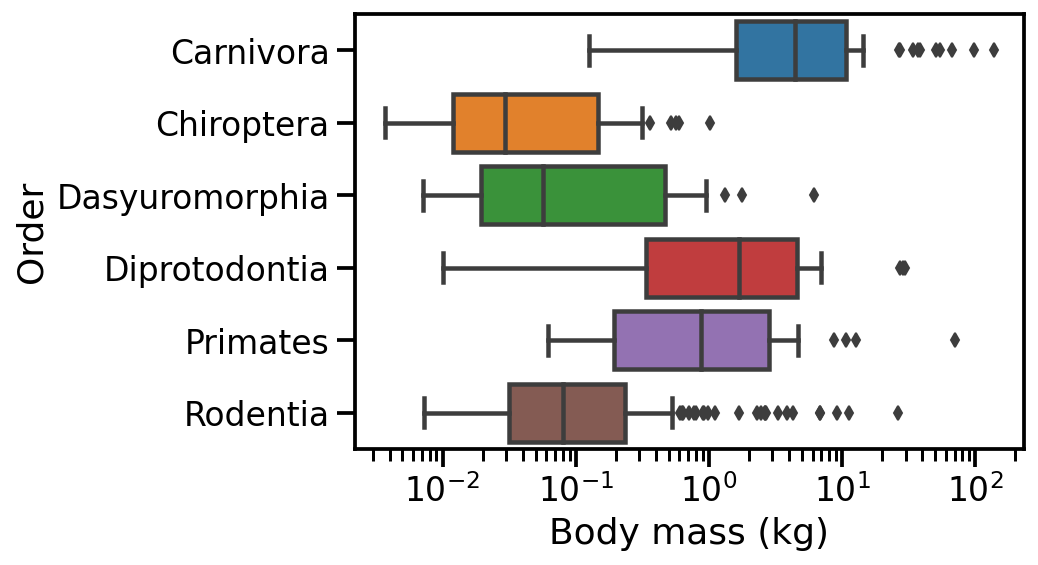

Now, we'll use a t-test (implemented in the `scipy.stats` module) to test the hypothesis that there is *no difference* in body mass between rodents and carnivores.

- `ttest_ind` calculates the t-test for the means of *two independent* samples of scores.
- `scipy.stats` has many more statistical tests, distributions, etc.

In [90]:
from scipy.stats import ttest_ind

In [91]:
carnivora_mass = abund_mammalia.loc[abund_mammalia['Order']=='Carnivora', 'Body mass (kg)']
rodentia_mass = abund_mammalia.loc[abund_mammalia['Order']=='Rodentia', 'Body mass (kg)']

res = ttest_ind(carnivora_mass, rodentia_mass, equal_var=False)
print(res)
print("P-value of t-test: {:.3g}".format(res.pvalue))

Ttest_indResult(statistic=3.850908489237815, pvalue=0.00032792622013371126)
P-value of t-test: 0.000328


## Some more data manipulation

In this section we will analyze a data regarding machine malfunctioning.

For each machine, the data shows after how many hours it got broken, after how many hours a decision regarding the machine's status has been made, and the final status of the machine - whether it was fixed or sent for scrapping.

For each machine we have the following parameters:
* model
* submodel
* quality
* type
* stop (after how many hours the machine got broken)
* diagonosis (after how many hours a decision regarding the machine has been made - either it was fixed or sent for scrapping)
* fix-scrapping (0 means the machine was demolished, 1 means it was fixed)

Let's look at the data:

In [92]:
data = pd.read_csv(r'../data/sim_data/sim_part1.csv')
print(data.shape)
data.head()

(10085, 7)


,model,submodel,quality,type,stop,diagnosis,fix-scrapping
0,1000,0.02,0,A,602,1661,0
1,1000,0.02,1,A,42,911,0
2,1000,0.02,0,A,945,2164,0
3,1000,0.02,0,A,141,954,0
4,1000,0.02,1,A,38,709,0


But we have 3 csv files: sim_part1, sim_part2, sim_part3

We need to load them all, and merge:

In [95]:
import os

folder = r'../data/sim_data'

paths = (os.path.join(folder, fname) for fname in os.listdir(folder))
data = (pd.read_csv(p) for p in paths)
data = pd.concat(data)

print(data.shape)
data.head()

(30052, 7)


,model,submodel,quality,type,stop,diagnosis,fix-scrapping
0,1000,0.02,0,A,602,1661,0
1,1000,0.02,1,A,42,911,0
2,1000,0.02,0,A,945,2164,0
3,1000,0.02,0,A,141,954,0
4,1000,0.02,1,A,38,709,0


Let's see how many unique parameter values we have:

In [101]:
for col in data.columns: # run over the first 4 column names
    print(col, len(data[col].unique()))

model 1
submodel 1
quality 6
type 2
stop 9747
diagnosis 9968
fix-scrapping 2


We can see that all machines have the same model and submodel.

So we can slice the data and focus on the parameters that do change:

In [102]:
data = data.drop(columns=['model', 'submodel'])
data.head()

,quality,type,stop,diagnosis,fix-scrapping
0,0,A,602,1661,0
1,1,A,42,911,0
2,0,A,945,2164,0
3,0,A,141,954,0
4,1,A,38,709,0


We would like to add a column, that contains the duration of the fixing time (the diagnosis minus the stop).

Note that in our records some processes ended with fixing (fix-scrapping = 1), and some with scrapping (fix-scrapping = 0).

## Exercise

Add a new column, `fixtime`, to `data` that contains, for each row, 

- if `fix-scrapping` = 1, the value is the `diagnosis` value minus the `stop` value.

- if `fix-scrapping` = 0, the value is NaN. 

In [105]:
def fixtime(row):
    if row['fix-scrapping'] == 1:
        return row['diagnosis'] - row['stop']
    else:
        return np.nan

data['fixtime'] = [fixtime(row) for _, row in data.iterrows()]
data.tail()

,quality,type,stop,diagnosis,fix-scrapping,fixtime
9909,4,B,1309,1365,1,56.0
9910,0,A,464,1409,0,NaN
9911,4,A,103,209,1,106.0
9912,3,B,2491,2633,0,NaN
9913,4,A,4671,4805,0,NaN


We are interested in the fixtime only when the process finished with fixing (`fix-scrapping`=1).

In [106]:
print(data.fixtime.mean())

219.69917174558526


Now we would like to examine the effect of `quality`, `type` over the rest of the parameters. 

In order to do so we would like to extract all kinds of summary statistics for each `quality`, `type` couple.

In order to do so we first need to state that we want to group our data according to `quality` and `type`.

And then we need to aggregate the results with the desired operation (e.g. mean, variance, std etc.).

In [107]:
grouped = data.groupby(['quality', 'type'])
aggdata = grouped.mean()

print(aggdata.shape)
aggdata

(12, 4)


stop     diagnosis  fix-scrapping      fixtime
quality type                                                        
0       A       496.752841   1693.739042       0.045049  1172.297297
        B       505.901736   1703.140095       0.045777  1176.068966
1       A       755.784458   1556.570552       0.076892   805.601064
        B      1159.636141   1857.556419       0.098528   690.804979
2       A      1172.302682   1639.952107       0.121839   464.814465
        B      2499.305677   2896.693926       0.178245   391.360802
3       A      2605.216130   2902.658721       0.160509   298.366337
        B      4138.732677   4337.070472       0.258661   199.427702
4       A      5127.064722   5226.892529       0.220136    99.159710
        B      6577.664740   6656.641206       0.352601    79.200234
5       A     10338.669062  10387.654691       0.493413    49.737055
        B      9825.202199   9874.540636       0.500196    49.076923

What if we want more than one statistics? For example mean, std and len (= # of observations).

We can specify for each column what are the operators we want to activate.

We can do this using pandas [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) method. The input of the method is a dictionary where: 
* the keys are the column names
* the values are lists of functions/methods.

In [112]:
aggdata = grouped.agg({'stop' : [np.mean, np.std, len], 
                       'fixtime' : [np.mean, np.std, len], 
                       'fix-scrapping' : [np.mean, np.std, len]})
aggdata

stop                          fixtime                    \
                      mean           std   len         mean         std   len   
quality type                                                                    
0       A       496.752841    512.454005  2464  1172.297297  345.869907  2464   
        B       505.901736    502.359842  2534  1176.068966  383.987697  2534   
1       A       755.784458    750.030962  2445   805.601064  239.444266  2445   
        B      1159.636141   1131.168199  2446   690.804979  202.320763  2446   
2       A      1172.302682   1241.222902  2610   464.814465  133.471674  2610   
        B      2499.305677   2512.453320  2519   391.360802  112.665311  2519   
3       A      2605.216130   2611.908894  2517   298.366337   84.024364  2517   
        B      4138.732677   4170.695832  2540   199.427702   58.168343  2540   
4       A      5127.064722   5422.868957  2503    99.159710   28.046194  2503   
        B      6577.664740   6604.403032  2422    79.200234   22.856881  2422   
5       A     10338.669062  10444.469269  2505    49.737055   14.658585  2505   
        B      9825.202199  10019.793194  2547    49.076923   14.195760  2547   

             fix-scrapping                  
                      mean       std   len  
quality type                                
0       A         0.045049  0.207453  2464  
        B         0.045777  0.209043  2534  
1       A         0.076892  0.266474  2445  
        B         0.098528  0.298088  2446  
2       A         0.121839  0.327163  2610  
        B         0.178245  0.382795  2519  
3       A         0.160509  0.367150  2517  
        B         0.258661  0.437985  2540  
4       A         0.220136  0.414421  2503  
        B         0.352601  0.477879  2422  
5       A         0.493413  0.500056  2505  
        B         0.500196  0.500098  2547

In `fixtime` column we wanted to consider only non-NaN values. 

`np.mean` and `np.std` indeed didn’t consider NaN values but len function did!

In order to overcome this, we’ll define our own function:

In [121]:
def len_(x): # x is an array of values
    '''returns the size of the non-nan values in the array'''
    return (~np.isnan(x)).sum()

In [122]:
aggdata = grouped.agg({'stop' : [np.mean, np.std, len_],
                       'fixtime' : [np.mean, np.std, len_],
                       'fix-scrapping' : [np.mean, np.std, len_]})
aggdata

stop                          fixtime                    \
                      mean           std  len_         mean         std  len_   
quality type                                                                    
0       A       496.752841    512.454005  2464  1172.297297  345.869907   111   
        B       505.901736    502.359842  2534  1176.068966  383.987697   116   
1       A       755.784458    750.030962  2445   805.601064  239.444266   188   
        B      1159.636141   1131.168199  2446   690.804979  202.320763   241   
2       A      1172.302682   1241.222902  2610   464.814465  133.471674   318   
        B      2499.305677   2512.453320  2519   391.360802  112.665311   449   
3       A      2605.216130   2611.908894  2517   298.366337   84.024364   404   
        B      4138.732677   4170.695832  2540   199.427702   58.168343   657   
4       A      5127.064722   5422.868957  2503    99.159710   28.046194   551   
        B      6577.664740   6604.403032  2422    79.200234   22.856881   854   
5       A     10338.669062  10444.469269  2505    49.737055   14.658585  1236   
        B      9825.202199  10019.793194  2547    49.076923   14.195760  1274   

             fix-scrapping                  
                      mean       std  len_  
quality type                                
0       A         0.045049  0.207453  2464  
        B         0.045777  0.209043  2534  
1       A         0.076892  0.266474  2445  
        B         0.098528  0.298088  2446  
2       A         0.121839  0.327163  2610  
        B         0.178245  0.382795  2519  
3       A         0.160509  0.367150  2517  
        B         0.258661  0.437985  2540  
4       A         0.220136  0.414421  2503  
        B         0.352601  0.477879  2422  
5       A         0.493413  0.500056  2505  
        B         0.500196  0.500098  2547

We can now present our data in a figure. We’ll make a 3-panels figure:
* stop time
* fixing time
* fixing probability

All three as a function of the quality parameter.

Each panel will show two curves, one for type A and another for type B.

We start by generating the formation of our figure:

```python
fig, ax = plt.subplots(1, 3, figsize = (16,5))
```

`plt.subplots` return 2 objects
* A figure object
* An array of axes  objects 

In [140]:
type_val

'B'

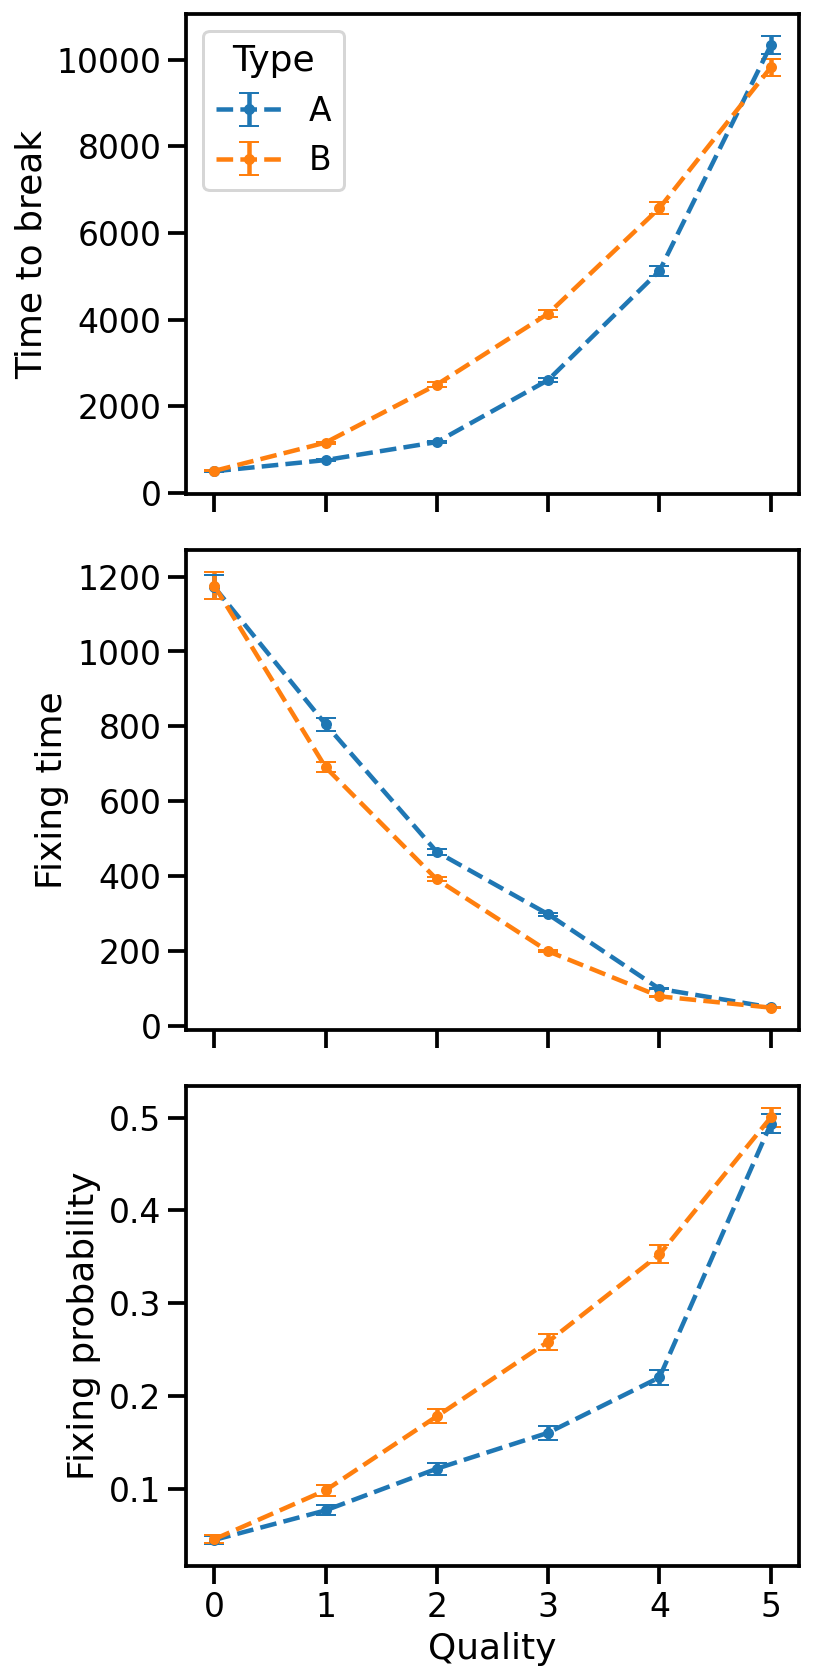

In [149]:
params = ['stop', 'fixtime', 'fix-scrapping']
labels = ['Time to break', 'Fixing time', 'Fixing probability'] ###<->### for easy ylabels settings

type_values = ['A','B']
x = sorted(data['quality'].unique()) # generate x-axis

fig, axes = plt.subplots(3, 1, figsize = (6, 12), sharex=True)

for i, param, ylabel, ax in zip(range(3), params, labels, axes):  # in each iteration we’ll produce a different subplot
    for type_val in type_values: # in each iteration we’ll produce a different curve
        y = aggdata.loc[aggdata['type'] == type_val, param]['mean']
        n = aggdata.loc[aggdata['type'] == type_val, param]['len_']
        sem = aggdata.loc[aggdata['type'] == type_val, param]['std'] / np.sqrt(n) # standard error of the mean
        ax.errorbar(x, y, yerr=sem, ls='--', marker='.', capsize=5, label=type_val)
    
    axes[i].set_ylabel(ylabels[i])
axes[-1].set_xlabel('Quality')
axes[-1].set_xticks(np.arange(6))
axes[-1].set_xticklabels(np.arange(6))
axes[0].legend(title='Type', loc=0) # legend only in one panel
fig.tight_layout() # adjust the space between the panels

# References

- Examples: [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html)
- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Tutorial: [An Introduction to Pandas](http://www.synesthesiam.com/posts/an-introduction-to-pandas.html)

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)